In [2]:
!pip install sidetable
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import sidetable
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [6]:
# read an example file - 2020/10/01
df = pd.read_csv("C:/Users/procns/Desktop/인공지능/PoI\kaggle/2021.01.20.csv")
# first glance
df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,193.750000,270,191,786,445.0,4.600684,6,6,6,786,60548.0,1611103133422618,1611103132188772,2120.91530,malicious,1.233846
1,5.000000,48,48,786,123.0,4.999620,1,1,17,786,123.0,1611103133548769,1611103133538447,479.96356,outlier,0.010322
2,93.250000,1443,1176,786,22.0,6.803977,12,14,6,786,30002.0,1611103135304654,1611103134149529,17819.61500,malicious,1.155125
3,337.400000,1036,14727,786,9200.0,2.421072,15,6,6,786,39398.0,1611103137511772,1611103132447,38163.36300,benign,5.064772
4,347.974359,9638,30948,786,9200.0,2.704629,156,86,6,786,39370.0,1611103139493602,1611103112328925,109770.08000,benign,27.164677


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364477 entries, 0 to 364476
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        364477 non-null  float64
 1   bytes_in       364477 non-null  int64  
 2   bytes_out      364477 non-null  int64  
 3   dest_ip        364477 non-null  int64  
 4   dest_port      333002 non-null  float64
 5   entropy        364477 non-null  float64
 6   num_pkts_out   364477 non-null  int64  
 7   num_pkts_in    364477 non-null  int64  
 8   proto          364477 non-null  int64  
 9   src_ip         364477 non-null  int64  
 10  src_port       333002 non-null  float64
 11  time_end       364477 non-null  int64  
 12  time_start     364477 non-null  int64  
 13  total_entropy  364477 non-null  float64
 14  label          364477 non-null  object 
 15  duration       364477 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 44.5+ MB


In [8]:
df.isna().mean()*100

avg_ipt          0.000000
bytes_in         0.000000
bytes_out        0.000000
dest_ip          0.000000
dest_port        8.635662
entropy          0.000000
num_pkts_out     0.000000
num_pkts_in      0.000000
proto            0.000000
src_ip           0.000000
src_port         8.635662
time_end         0.000000
time_start       0.000000
total_entropy    0.000000
label            0.000000
duration         0.000000
dtype: float64

In [9]:
df.dropna(axis=0,inplace=True,how="any")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333002 entries, 0 to 364475
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   avg_ipt        333002 non-null  float64
 1   bytes_in       333002 non-null  int64  
 2   bytes_out      333002 non-null  int64  
 3   dest_ip        333002 non-null  int64  
 4   dest_port      333002 non-null  float64
 5   entropy        333002 non-null  float64
 6   num_pkts_out   333002 non-null  int64  
 7   num_pkts_in    333002 non-null  int64  
 8   proto          333002 non-null  int64  
 9   src_ip         333002 non-null  int64  
 10  src_port       333002 non-null  float64
 11  time_end       333002 non-null  int64  
 12  time_start     333002 non-null  int64  
 13  total_entropy  333002 non-null  float64
 14  label          333002 non-null  object 
 15  duration       333002 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 43.2+ MB


In [13]:
df.nunique()

avg_ipt           21403
bytes_in           9133
bytes_out         21899
dest_ip               1
dest_port         17440
entropy          173100
num_pkts_out        256
num_pkts_in         243
proto                 2
src_ip                1
src_port          31510
time_end         330227
time_start       330222
total_entropy    177796
label                 3
duration          92192
dtype: int64

<AxesSubplot:>

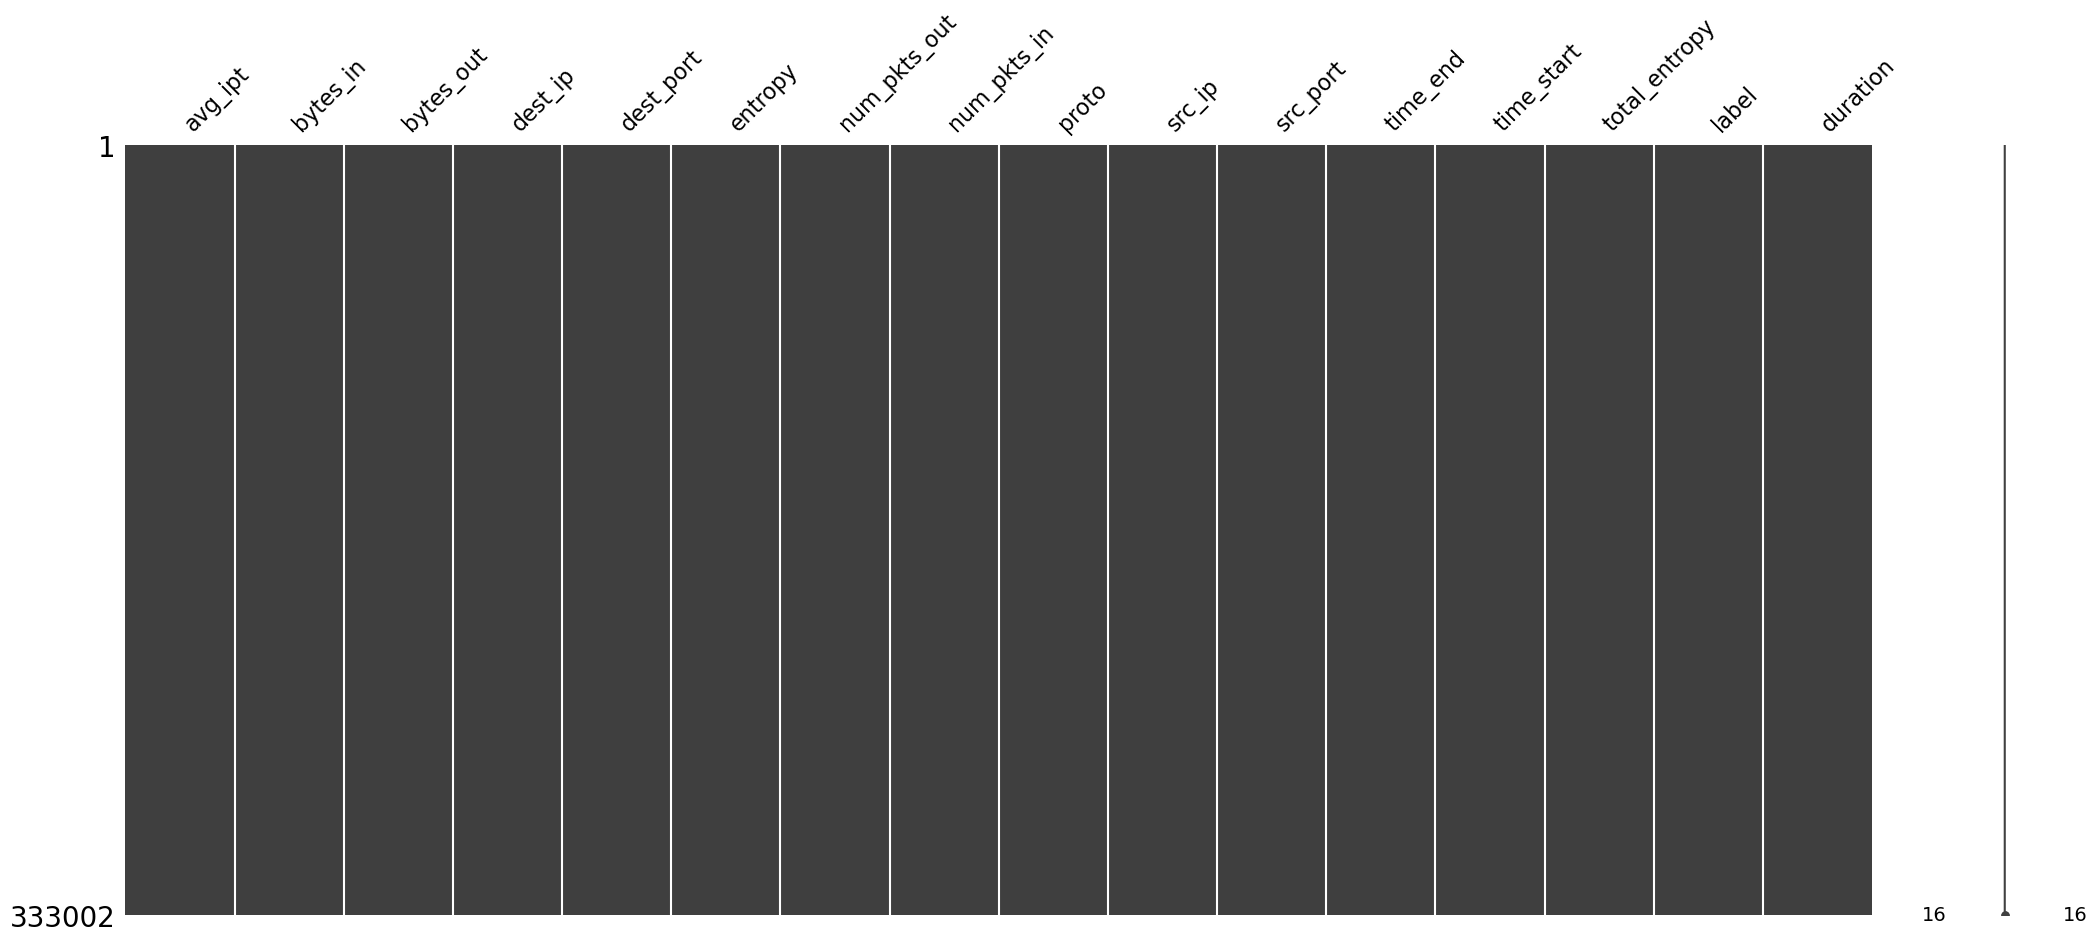

In [19]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [18]:
 !pip install missingno

In [20]:
df.drop(["src_ip","dest_ip","time_end","time_start"],axis=1,inplace=True)

In [21]:
df.count()

avg_ipt          333002
bytes_in         333002
bytes_out        333002
dest_port        333002
entropy          333002
num_pkts_out     333002
num_pkts_in      333002
proto            333002
src_port         333002
total_entropy    333002
label            333002
duration         333002
dtype: int64

In [22]:
df.corr()

,avg_ipt,bytes_in,bytes_out,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_port,total_entropy,duration
avg_ipt,1.000000,0.016506,0.036688,-0.025773,0.047447,0.007565,0.023645,-0.011875,0.028225,0.033202,0.012682
bytes_in,0.016506,1.000000,0.379605,0.054804,0.055321,0.670222,0.743087,0.019266,-0.046718,0.657075,0.169166
bytes_out,0.036688,0.379605,1.000000,-0.205261,-0.061063,0.589330,0.525090,-0.082191,0.207321,0.755990,0.153517
dest_port,-0.025773,0.054804,-0.205261,1.000000,-0.214244,-0.117542,-0.120658,-0.136499,-0.702599,-0.177719,-0.028684
entropy,0.047447,0.055321,-0.061063,-0.214244,1.000000,0.049778,0.088160,0.077371,0.156251,0.139987,0.000879
num_pkts_out,0.007565,0.670222,0.589330,-0.117542,0.049778,1.000000,0.802946,-0.031054,0.126749,0.745280,0.203468
num_pkts_in,0.023645,0.743087,0.525090,-0.120658,0.088160,0.802946,1.000000,-0.008936,0.121025,0.770327,0.201010
proto,-0.011875,0.019266,-0.082191,-0.136499,0.077371,-0.031054,-0.008936,1.000000,-0.183476,-0.075573,0.014873
src_port,0.028225,-0.046718,0.207321,-0.702599,0.156251,0.126749,0.121025,-0.183476,1.000000,0.185695,0.021007
total_entropy,0.033202,0.657075,0.755990,-0.177719,0.139987,0.745280,0.770327,-0.075573,0.185695,1.000000,0.179941


<AxesSubplot:>

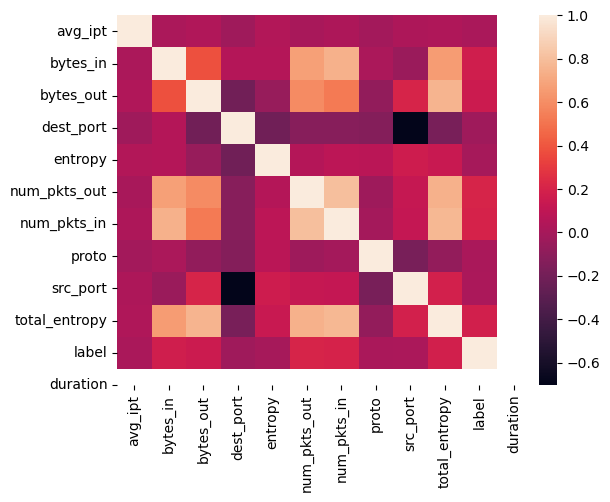

In [23]:
sns.heatmap(df.corr(),
            xticklabels=df.columns,
            yticklabels=df.columns
           )

In [24]:
x=df[['avg_ipt', 'bytes_in','bytes_out','dest_port','entropy','num_pkts_out','num_pkts_in','proto','src_port','total_entropy','duration']]

y=df['label']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n_neighbors=30
scores=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy=',accuracy_score(y_pred,y_test))

C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9444002342307173


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9452710920256453


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9449257518655876


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9456764913439738


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9452560772360775


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9454062251317548


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9450909145508326


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9456014173961352


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9453611807630516


In [26]:
df_metrics=df.loc[:, df.columns != 'label']

In [27]:
from sklearn.preprocessing import MinMaxScaler

values = df_metrics.values

scaler = MinMaxScaler(feature_range=(0, 1))

scaledData = scaler.fit_transform(values)

In [28]:
from pandas import DataFrame

df_scaled= DataFrame(scaledData)

In [29]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,4.511094e-08,0.004166,0.002915,0.006775,0.087490,0.023529,0.023529,0.0,0.923916,0.001398,1.176800e-04
1,1.164153e-09,0.000741,0.000732,0.001862,0.095077,0.003922,0.003922,1.0,0.001862,0.000316,9.844768e-07
2,2.171146e-08,0.022265,0.017945,0.000320,0.129390,0.047059,0.054902,0.0,0.457800,0.011747,1.101718e-04
3,7.855706e-08,0.015985,0.224726,0.140370,0.046041,0.058824,0.023529,0.0,0.601178,0.025159,4.830605e-04
4,8.101909e-08,0.148712,0.472251,0.140370,0.051433,0.611765,0.337255,0.0,0.600751,0.072365,2.590873e-03
...,...,...,...,...,...,...,...,...,...,...,...
332997,1.280569e-09,0.000741,0.000732,0.001862,0.089764,0.003922,0.003922,1.0,0.001862,0.000299,1.120007e-06
332998,0.000000e+00,0.000000,0.000000,0.078936,0.000000,0.011765,0.003922,0.0,0.654251,0.000000,2.314217e-06
332999,0.000000e+00,0.000000,0.000000,0.204306,0.000000,0.011765,0.003922,0.0,0.704759,0.000000,4.748131e-06
333000,1.280569e-09,0.000741,0.000732,0.001862,0.088620,0.003922,0.003922,1.0,0.001862,0.000295,1.124871e-06


In [30]:
x_scaled=df_scaled
y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n_neighbors=30
scores=[]
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy=',accuracy_score(y_pred,y_test))

C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9467125118241467


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9470578519842044


C:\Users\procns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy= 0.9469977928259335
